In [ ]:
# totals_colinear_columns = [
#     'points',
#     'fantasy_points',
#     'total_rebounds',
#     'made_field_goals',
#     'attempted_field_goals',
#     'field_goal_percentage',
#     'attempted_three_point_field_goals',
#     'three_point_field_goal_percentage',
#     'games_started',
#     'attempted_two_point_field_goals',
#     'two_point_field_goal_percentage',
#     'attempted_free_throws',
#     'free_throw_percentage'
# ]
# advanced_colinear_columns = [
#     'win_shares',
#     'box_plus_minus',
#     'total_rebound_percentage',
#     'fantasy_points',
#     'age',
#     'games_played',
#     'offensive_win_shares',
#     'offensive_box_plus_minus',
#     'win_shares_per_48_minutes',
#     'player_efficiency_rating',
#     'true_shooting_percentage',
#     'turnover_percentage',
#     'offensive_rebound_percentage',
#     'free_throw_attempt_rate',
#     'minutes_played',
#     'three_point_attempt_rate'
# ]
# totals_colinear_columns.extend(advanced_colinear_columns)
# columns_to_drop = list(set(totals_colinear_columns))
# columns_to_drop.extend(['assist_percentage', 'defensive_rebound_percentage', 'steal_percentage', 'block_percentage', 'defensive_win_shares', 'made_two_point_field_goals', 'defensive_box_plus_minus'])
# df = df.drop(columns=columns_to_drop)

In [1]:
import sys
sys.path.append('C:\\Users\\CA015FO\\basketball')
from sqlite import push_data, get_data
df = get_data('totals_advanced_nodummies_nonspecific_min41games_normalizedgames_premodel')
df.head()

,two_point_field_goal_percentage,block_percentage,win_shares_per_48_minutes,games_started,win_shares,offensive_rebound_percentage,defensive_rebound_percentage,turnover_percentage,effective_field_goal_percentage,defensive_rebounds,...,points,defensive_win_shares,player_efficiency_rating,three_point_field_goal_percentage,total_rebounds,field_goal_percentage,attempted_two_point_field_goals,free_throw_attempt_rate,offensive_box_plus_minus,future_fantasy_points
0,0.515000,1.800000,0.141000,0.0,3.800000,9.600000,13.500000,15.200000,0.510000,156.0,...,737.0,1.500000,18.700000,0.000000,270.0,0.510000,559.0,0.361,1.7,805.50
1,0.577000,0.300000,0.189000,0.0,10.500000,8.300000,14.000000,13.500000,0.576000,333.0,...,1903.0,1.100000,24.300000,0.000000,516.0,0.576000,1265.0,0.415,5.3,2677.35
2,0.499615,1.384615,0.106308,0.0,2.984615,11.276923,14.930769,14.661538,0.498769,336.0,...,1318.0,1.115385,17.946154,0.205231,605.0,0.498154,1107.0,0.232,1.6,2772.50
3,0.482000,0.100000,0.091000,0.0,4.400000,9.000000,16.700000,16.700000,0.482000,342.0,...,953.0,1.200000,16.600000,0.286000,512.0,0.480000,778.0,0.310,1.4,1652.05
4,0.513000,0.700000,0.091000,0.0,4.000000,2.900000,6.800000,21.400000,0.505000,127.0,...,843.0,1.400000,15.100000,0.158000,184.0,0.503000,637.0,0.337,0.6,1277.65


In [2]:
# OLS Assumption 1: The regression model is linear in the coefficients and the error term (linearity of the model)
import statsmodels.api as sm
x = df.iloc[:,:-1]
y = df['future_fantasy_points']
x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()
model.summary()

C:\Users\CA015FO\AppData\Local\Continuum\anaconda3\envs\my_env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     future_fantasy_points   R-squared:                       0.624
Model:                               OLS   Adj. R-squared:                  0.622
Method:                    Least Squares   F-statistic:                     361.8
Date:                   Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                           13:07:26   Log-Likelihood:                -67727.
No. Observations:                   8980   AIC:                         1.355e+05
Df Residuals:                       8938   BIC:                         1.358e+05
Df Model:                             41                                         
Covariance Type:               nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1806.3218    196.440      9.195      0.000    1421.254    2191.390
two_point_field_goal_percentage     258.4828    443.295      0.583      0.560    -610.477    1127.443
block_percentage                     -1.2066     11.884     -0.102      0.919     -24.501      22.088
win_shares_per_48_minutes           991.4081    635.595      1.560      0.119    -254.503    2237.319
games_started                         1.1698      0.266      4.404      0.000       0.649       1.690
win_shares                           55.6633     98.124      0.567      0.571    -136.682     248.009
offensive_rebound_percentage        -28.2502     25.613     -1.103      0.270     -78.457      21.956
defensive_rebound_percentage        -12.9712     22.841     -0.568      0.570     -57.744      31.801
turnover_percentage                   7.7424      3.494      2.216      0.027       0.893      14.592
effective_field_goal_percentage   -2736.9806   2307.531     -1.186      0.236   -7260.271    1786.309
defensive_rebounds                   -0.2029      0.224     -0.904      0.366      -0.643       0.237
free_throw_percentage                -5.3601    125.634     -0.043      0.966    -251.632     240.912
personal_fouls                       -0.9692      0.177     -5.491      0.000      -1.315      -0.623
value_over_replacement_player       -78.3779     24.540     -3.194      0.001    -126.481     -30.275
turnovers                             0.6162      0.406      1.517      0.129      -0.180       1.413
offensive_rebounds                    0.0965      0.289      0.333      0.739      -0.471       0.664
box_plus_minus                       41.8463     98.450      0.425      0.671    -151.138     234.830
made_free_throws                      0.0706      0.516      0.137      0.891      -0.940       1.081
attempted_field_goals                -0.3171      0.203     -1.560      0.119      -0.716       0.081
usage_percentage                     21.2654      5.498      3.868      0.000      10.487      32.044
assists                              -0.2926      0.236     -1.238      0.216      -0.756       0.171
made_field_goals                      0.1156      0.147      0.785      0.433      -0.173       0.404
minutes_played                       -0.2047      0.046     -4.404      0.000      -0.296      -0.114
steal_percentage                    -22.7395     27.142     -0.838      0.402     -75.943      30.464
offensive_win_shares                -41.8346     98.440     -0.425      0.671    -234.799     151.130
age                                 -31.4878      1.380    -22.814      0.000     -34.193     -28.782
made_three_point_field_goals         -0.1100      0.571     -0.193      0.847      -1.229   

In [8]:
# OLS Assumption 2: The error term has a population mean of zero
# Expectation (mean) of residuals is zero
# Our constant makes sure this is 0
model.resid.mean()

5.820381227219042e-11

In [11]:
# OLS Assumption 3: All independent variables are uncorrelated with the error term (exogeneity)

In [ ]:
# OLS Assumption 4: Observations of the error term are uncorrelated with each other

In [ ]:
# OLS Assumption 5: The error term has a constant variance (no heteroscedasticity)

In [ ]:
# OLS Assumption 6: No independent variable is a perfect linear function of other explanatory variables

In [ ]:
# OLS Assumption 7: The error term is normally distributed (optional)

(-4.628600546143048, 5.098344970559382)

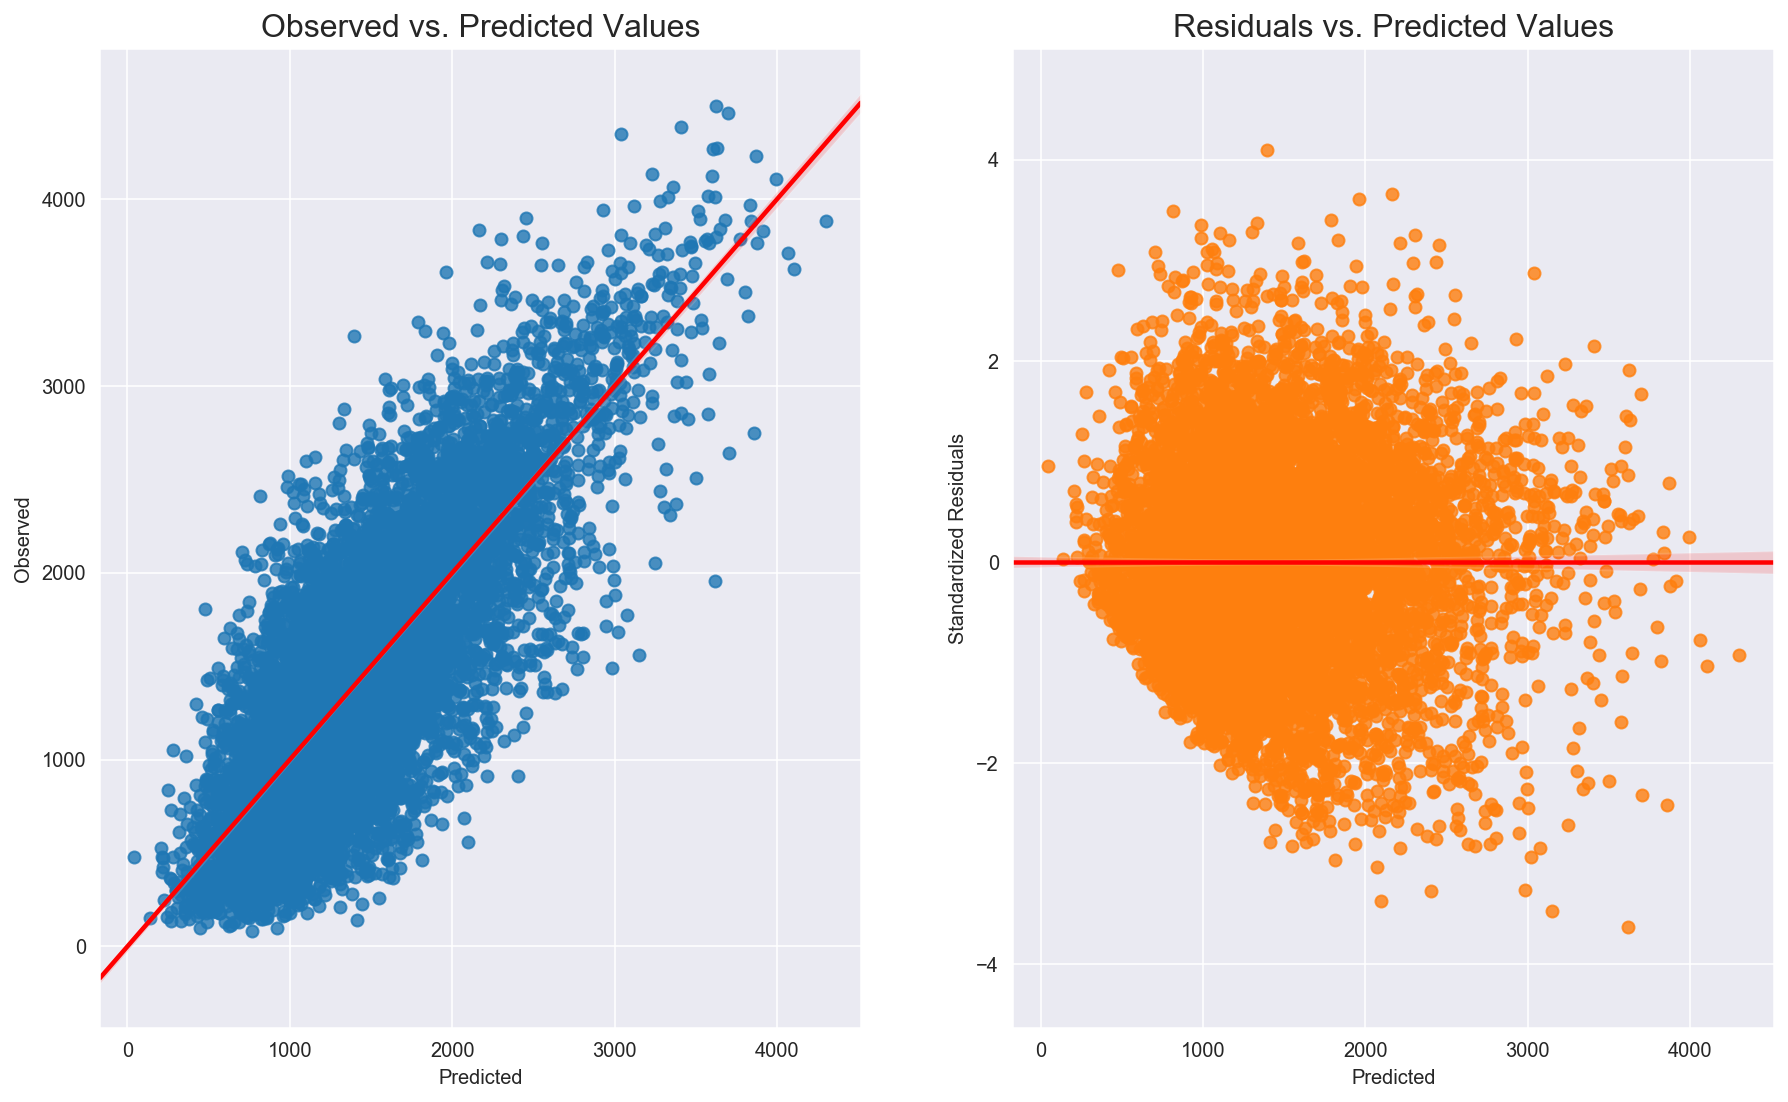

In [6]:
# Observed vs. Predicted Values should be perfectly diagonal with points equally distributed around it
# Residuals vs. Predicted Values should be perfectly flat with points equally distributed around it

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

fitted_vals = model.predict()
resids = model.resid_pearson

fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=y, ax=ax[0], line_kws={'color':'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=fitted_vals, y=resids, ax=ax[1], line_kws={'color':'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Standardized Residuals')
ax[1].set_ylim([resids.min()-1, resids.max()+1])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
vif_df = pd.DataFrame({'vif':vif[1:]}, index=x.columns)
vif_df.sort_values(by='vif', ascending=False).T

In [ ]:
corr_df = df.corr()
corr_df['turnovers'].sort_values(ascending=False)

In [ ]:
model.pvalues

In [ ]:
model.summary()